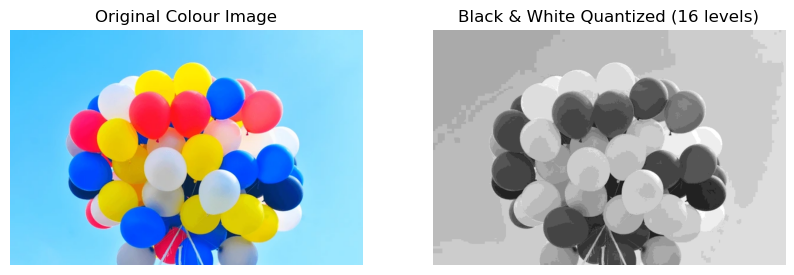

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def to_quantized_bw(img, levels=16):
    img = img.convert("RGB")
    w, h = img.size
    out = Image.new("RGB", (w, h))
    px = img.load()
    opx = out.load()
    for y in range(h):
        for x in range(w):
            r, g, b = px[x, y]
            gray = int(0.21*r + 0.72*g + 0.07*b)
            step = 255 // (levels - 1)
            q = round(gray / step) * step
            opx[x, y] = (q, q, q)
    return out

input_path = r"D:\sem 6\DIP\L01 images\group-colorful-balloons-against-clear-600nw-2659820893.webp"

img = Image.open(input_path)
bw_img = to_quantized_bw(img, 16)

os.makedirs("quant_results", exist_ok=True)
bw_img.save("quant_results/black_and_white_16_levels.png")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Colour Image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Black & White Quantized (16 levels)")
plt.imshow(bw_img, cmap="gray")
plt.axis("off")
plt.show()
